In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:Consolas;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size="5" color="red">ch10_N차원배열다루기_4절~6절</font>

# 4절. 복사와 뷰

## 4.1. 할당

In [2]:
import numpy as np

In [3]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [5]:
b = a
b

array([0, 1, 2, 3, 4, 5])

In [7]:
# a 와 b가 같은 객체냐?
a is b

True

In [10]:
b.shape = (2,3)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [11]:
a

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2. 뷰 (VIEW)

- 슬라이싱할 경우 자동 view 생성

In [13]:
c = np.arange(12).reshape(2, -1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [15]:
d = c.view()  # c의 뷰 생성 : 얇은 복사
d is c  # c객체와 d객체가 같냐?

False

In [16]:
id(c), id(d)

(2758303887120, 2758303889232)

In [23]:
np.all(c == d) # c 와 d 의 내용이 모두 같음

True

In [26]:
d.shape = (3, 4)
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [31]:
d[0,::2] = -99
d

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [33]:
c

array([[-99,   1, -99,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

In [36]:
# 슬라이싱이 될떄, 자동 뷰가 반환됨
c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [38]:
d = c[:,:-1]
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [39]:
d[..., -1] = 99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [40]:
c

array([[ 0,  1,  2,  3, 99,  5],
       [ 6,  7,  8,  9, 99, 11]])

## 4.3. 깊은복사

In [41]:
c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [47]:
d = c[:, :-1].copy()  # 깊은 복사
d[..., -2] = 99
d

array([[ 0,  1,  2, 99,  4],
       [ 6,  7,  8, 99, 10]])

In [48]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5절. 고급인덱싱

## 5.1. 인덱싱 배열로 인덱싱

In [60]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [61]:
a[[0, 0, 1, 5]]

array([ 0,  0,  1, 25])

In [72]:
## 인덱싱하기 위한 값을 배열로 만듧
i = np.array([0, 0, 1, 5])
a[i]


array([ 0,  0,  1, 25])

In [65]:
# 인덱실하기 위한 값을 배열로 만듧
j = np.array([[0,0],[1,5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [ ]:
# image_data = [
#     [[255, 255, 255], [255, 255, 255][255, 255, 255][0, 0, 0]],
# ]

In [75]:
palette = np.array([[0, 0, 0], # black
                   [255, 0, 0], # red
                   [0, 255, 0], # green
                   [0, 0, 255], # blue
                   [255, 255, 255]]) # white

In [93]:
image_index = np.array([[4, 4, 4, 0, 0, 0, 0, 4, 4, 4],
                        [4, 0, 0, 4, 4, 4, 4, 0, 0, 4],
                        [0, 0, 4, 4, 4, 4, 4, 4, 0, 0],
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
                        [0, 4, 4, 4, 4, 4, 4, 4, 4, 0],
                        [0, 4, 4, 2, 4, 4, 2, 4, 4, 0],
                        [4, 0, 4, 4, 2, 2, 4, 4, 0, 4],
                        [4, 4, 0, 4, 4, 4, 4, 0, 4, 4],
                        [4, 4, 4, 0, 0, 0, 0, 4, 4, 4]])
# palette.shape
image_data = palette[image_index]

In [95]:
image_data.shape

(10, 10, 3)

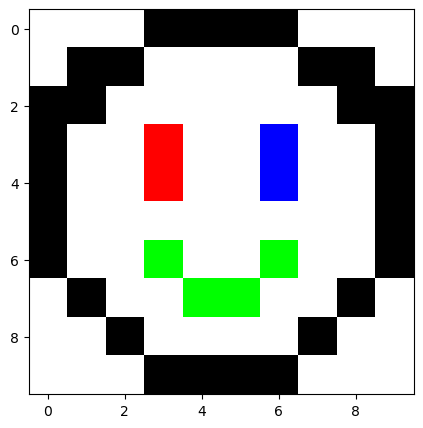

In [100]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(image_data)
plt.show()

## 5.2. 논리 배열을 이용한 인덱싱

In [102]:
a = np.array([0,1,10,11,12,13,14,15,99])
a

array([ 0,  1, 10, 11, 12, 13, 14, 15, 99])

In [105]:
a % 2 == 0  # 논리배열

array([ True, False,  True, False,  True, False,  True, False, False])

In [107]:
a[[True, False, True, False, True, False, True, False, False]]

array([ 0, 10, 12, 14])

In [108]:
a[a % 2 == 0] # 논리 배열을 이용한 인덱싱 시 True요소만 추출 

array([ 0, 10, 12, 14])

In [109]:
# a 에서 12 보다 큰 값만 추출
a[a > 12]

array([13, 14, 15, 99])

# 6절. 선형대수

- 2차원 넘파이배열을 행렬
    * 행렬곱 : @, dot(), 단위행렬
    * 역행렬 : np.linalg.inv(행렬) : 역행렬@행렬 - 단위행렬
    * 전치행렬 : 행렬.T / 행렬.transpose()

In [111]:
a = np.array([[1, 2], [3, 4]])
a  # 정방행렬 : 정방행렬만 역행렬을 구할 수 있다.

array([[1, 2],
       [3, 4]])

In [113]:
# a의 역행렬 : a의 역행렬 @ a = a @ a의 역행렬 -> 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [115]:
# 단위행렬
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

## 6.1. 선형 연립 방정식 풀기 (독립변수1, 데이터2)

In [123]:
x = np.array([2, 4])  # 독립변수
Y = np.array([40, 60])  # 종속변수

X = np.dstack((x, np.ones(len(x))))
X

array([[[2., 1.],
        [4., 1.]]])

In [124]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y
# wb = X의 역행렬 @ Y

wb = np.linalg.inv(X) @ Y
wb

array([[10., 20.]])

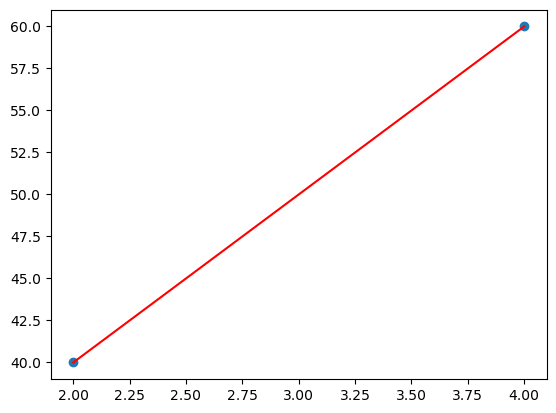

In [128]:
import matplotlib.pyplot as plt

plt.scatter(x, Y)
plt.plot(x, 10 * x + 20, 'r')

In [129]:
5*10+20

70